In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/NLP_Project/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


# New Section

In [ ]:
df1 = df.sample(50000,random_state=250)


In [ ]:
df1.reset_index(inplace =True)

In [ ]:
# df1.head()
df1 = df1.drop('index',axis=1)
df1.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[' Leisure trip ', ' Couple ', ' Superior Doub...",338 day,41.402362,2.211905
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[' Business trip ', ' Group ', ' Premium Doubl...",238 day,52.376418,4.900220
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",534 day,51.514400,-0.156551
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",26 days,48.873278,2.300417
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",495 day,51.517167,-0.129053


In [ ]:
#append both positive and negative reviews
review = []
for row in range(0,len(df1)):
    review.append(''.join(str(x) for x in df1.iloc[row,[6,9]]))
#     review = review.strip()


In [ ]:
review = pd.DataFrame(review)
review.head()

,0
0,Bathtub and sink flush wasn t working properl...
1,The bedroom was tight and very small They exp...
2,No Negative Great to have ipads in the room an...
3,There was only one small issue with the room ...
4,Price of breakfast was high We went to an ama...


In [ ]:
review.columns = ['reviews']
review.head()

,reviews
0,Bathtub and sink flush wasn t working properl...
1,The bedroom was tight and very small They exp...
2,No Negative Great to have ipads in the room an...
3,There was only one small issue with the room ...
4,Price of breakfast was high We went to an ama...


In [ ]:
review['reviews'] = review['reviews'].apply(lambda x:x.replace('No Negative',''))
review['reviews'] = review['reviews'].apply(lambda x:x.replace('No Positive',''))
review.head()

,reviews
0,Bathtub and sink flush wasn t working properl...
1,The bedroom was tight and very small They exp...
2,Great to have ipads in the room and the break...
3,There was only one small issue with the room ...
4,Price of breakfast was high We went to an ama...


In [ ]:
# len(review['reviews']),len(df1['reviews'])

In [ ]:
# review[review['reviews'] == 'No Positive No Negative']

In [ ]:
#appending the combined column(i.e review ) in df1
df1['reviews'] = review

In [ ]:
df1.isnull().sum()

Hotel_Address                                   0
Additional_Number_of_Scoring                    0
Review_Date                                     0
Average_Score                                   0
Hotel_Name                                      0
Reviewer_Nationality                            0
Negative_Review                                 0
Review_Total_Negative_Word_Counts               0
Total_Number_of_Reviews                         0
Positive_Review                                 0
Review_Total_Positive_Word_Counts               0
Total_Number_of_Reviews_Reviewer_Has_Given      0
Reviewer_Score                                  0
Tags                                            0
days_since_review                               0
lat                                           323
lng                                           323
reviews                                         0
dtype: int64

In [ ]:
df1 = df1.dropna()
df1.reset_index(inplace=True)

In [ ]:
df1.isnull().sum()

index                                         0
Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
reviews                                       0
dtype: int64

In [ ]:
df2 = df1.copy(deep=True)

In [ ]:
#EDA
#no of unique hotel addresses
    # hence there are 1469 unique hotel's in our dataset
len(df2['Hotel_Address'].value_counts())

1469

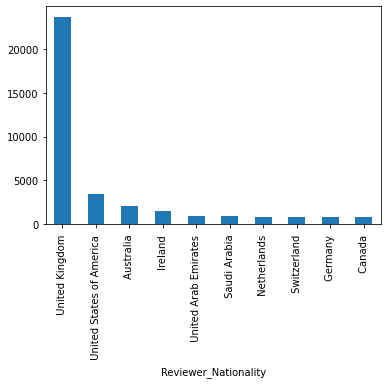

In [ ]:
#Top 10 count of hotel reviews based on Nationality
# So the no of reviews are from UK 
df2.groupby(['Reviewer_Nationality'])['Reviewer_Score'].count().sort_values(ascending=False)[0:10].plot.bar()

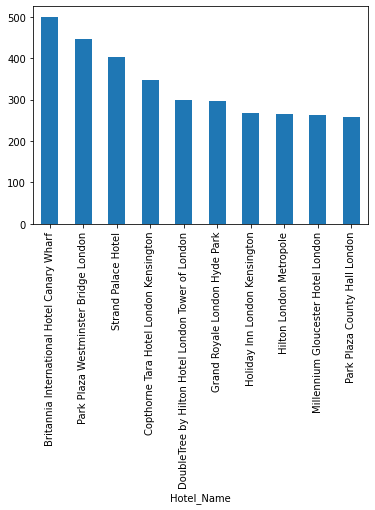

In [ ]:
#plot of count of overall reviews of hotel in descending order
df2.groupby(['Hotel_Name'])['reviews'].count().sort_values(ascending=False)[0:10].plot.bar()

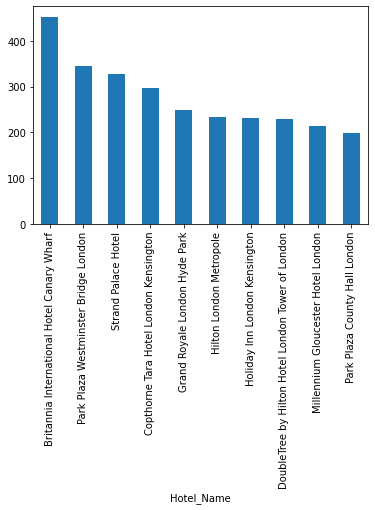

In [ ]:
# count of only negative reviews excluding the 'No Negative' review to the Hotels in descending order

df2[df2['Negative_Review'] != 'No Negative'].groupby(['Hotel_Name'])['Negative_Review'].count().sort_values(ascending = False)[0:10].plot.bar()

# Inference: Britannia International Hotel got highest no. of negative reviews

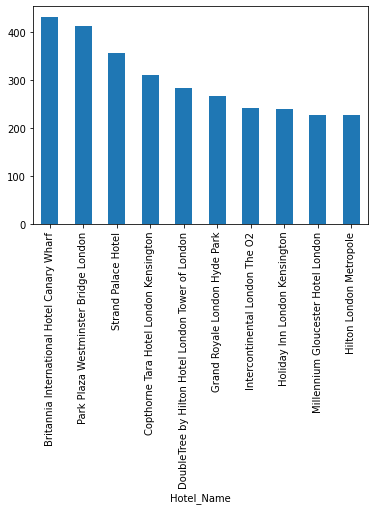

In [ ]:
# count of only Postive reviews excluding the 'No Positive' review to the Hotels in descending order
df2[df2['Positive_Review'] != 'No Positive'].groupby(['Hotel_Name'])['Positive_Review'].count().sort_values(ascending=False)[0:10].plot.bar()

# Inference: Britannia International Hotel also got highest no. of Postive reviews

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


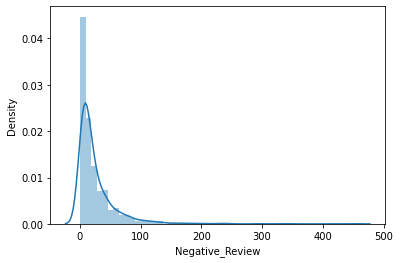

In [ ]:
#Inference: Most of the Hotels got negative reviews as no. of negative reviews probability is more
#compared to the positive reviews 
import seaborn as sns
sns.distplot(df2[df2['Negative_Review'] != 'No Negative'].groupby(['Hotel_Name'])['Negative_Review'].count())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


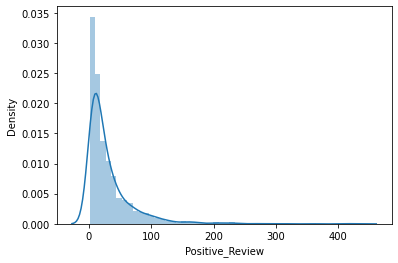

In [ ]:
sns.distplot(df2[df2['Positive_Review'] != 'No Positive'].groupby(['Hotel_Name'])['Positive_Review'].count())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


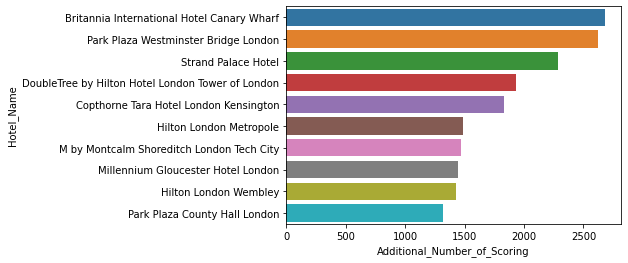

In [ ]:
#Inference: 'Additional_no_of_scoring' is based on the services given by the hotel to the customers
# and hence Britannia International Hotel is in the Top 10 Hotel's providing best services
x = df2.groupby('Hotel_Name')['Additional_Number_of_Scoring'].mean().sort_values(ascending=False)[0:10].index
y = df2.groupby('Hotel_Name')['Additional_Number_of_Scoring'].mean().sort_values(ascending=False)[0:10]
sns.barplot(y,x)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


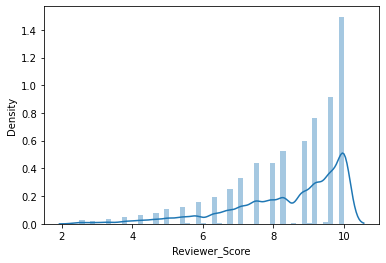

In [ ]:
#we can apply USL to see how clusters are formed based on the 'Reviewer_Score'
sns.distplot(df2['Reviewer_Score'])

In [ ]:
#Extracting the Country from the 'Hotel_Address' and creating the new column
df2['Hotel_Country'] = df2['Hotel_Address'].apply(lambda x: x.split()[-1])
df2['Hotel_Country'].value_counts()

Kingdom        25555
Spain           5735
France          5651
Netherlands     5550
Italy           3645
Austria         3541
Name: Hotel_Country, dtype: int64

In [ ]:
#Replaced the Kingdom as 'United Kingdom' 
df2['Hotel_Country'] = df2['Hotel_Country'].replace('Kingdom','United Kingdom')

In [ ]:
df2['Hotel_Country'].value_counts()

United Kingdom    25555
Spain              5735
France             5651
Netherlands        5550
Italy              3645
Austria            3541
Name: Hotel_Country, dtype: int64

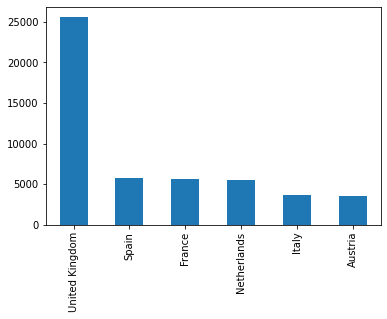

In [ ]:
#hotel's across the europe
df2['Hotel_Country'].value_counts().plot.bar()

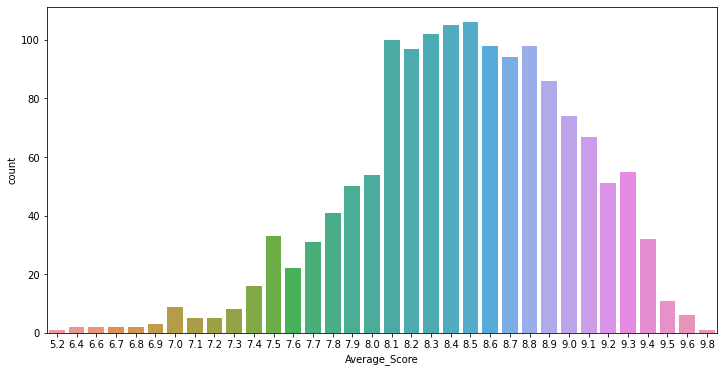

In [ ]:
#our dataset contains reviwer score mostly from 8.0 to 9.0 
dataset_avg_scores = df2[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (12,6))
sns.countplot(x = 'Average_Score',data = dataset_avg_scores)

In [ ]:
#highly rated hotels
df2[df2['Average_Score']>=7][['Hotel_Name','Hotel_Country','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by='Total_Number_of_Reviews',ascending=False)[0:10]

,Hotel_Name,Hotel_Country,Average_Score,Total_Number_of_Reviews
500,Hotel Da Vinci,Italy,8.1,16670
15,Park Plaza Westminster Bridge London,United Kingdom,8.7,12158
1537,Hotel degli Arcimboldi,Italy,8.3,10842
16,Strand Palace Hotel,United Kingdom,8.1,9568
63,Britannia International Hotel Canary Wharf,United Kingdom,7.1,9086
41,Best Western Premier Hotel Couture,Netherlands,8.7,8177
182,The Student Hotel Amsterdam City,Netherlands,8.7,7656
450,Golden Tulip Amsterdam West,Netherlands,8.5,7586
341,DoubleTree by Hilton Hotel London Tower of London,United Kingdom,8.7,7491
340,Glam Milano,Italy,8.8,7371


In [ ]:
#least rated hotels
df2[df2['Average_Score']<=7][['Hotel_Name','Hotel_Country','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by='Total_Number_of_Reviews',ascending=False)[0:10]

,Hotel_Name,Hotel_Country,Average_Score,Total_Number_of_Reviews
263,Idea Hotel Milano San Siro,Italy,6.9,5742
435,NH Carlton Amsterdam,Netherlands,7.0,4231
23,Henry VIII,United Kingdom,7.0,2937
57,Bloomsbury Palace Hotel,United Kingdom,6.8,2751
778,Commodore Hotel,United Kingdom,6.7,2400
910,Hotel Cavendish,United Kingdom,6.4,2275
997,IH Hotels Milano Lorenteggio,Italy,7.0,2181
520,Park Lane Mews Hotel,United Kingdom,7.0,2061
9,Gainsborough Hotel,United Kingdom,6.9,1884
2473,Savoy Hotel Amsterdam,Netherlands,6.4,995


In [ ]:
#We have taken random sample hence average_score and reviewer_score(mean) is differeing
# it will be same if we consider the whole dataset
pd.pivot_table(data= df2,index = 'Hotel_Name',values=['Reviewer_Score','Average_Score'])

,Average_Score,Reviewer_Score
Hotel_Name,,
11 Cadogan Gardens,8.7,9.600000
1K Hotel,7.7,7.623077
25hours Hotel beim MuseumsQuartier,8.8,8.966102
41,9.6,9.850000
45 Park Lane Dorchester Collection,9.4,9.580000
...,...,...
citizenM London Bankside,9.1,9.236905
citizenM London Shoreditch,9.1,9.120000
citizenM Tower of London,9.1,8.980000


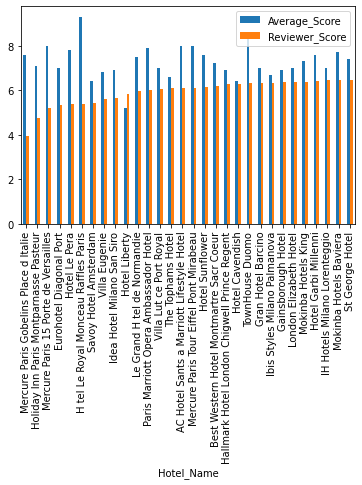

In [ ]:
#
pd.pivot_table(data= df2,index = 'Hotel_Name',values=['Reviewer_Score','Average_Score']).sort_values(by='Reviewer_Score',ascending=True)[:30].plot.bar()

In [ ]:
# Inference: Hotels where there was no review but still reviewe_score was given by reviewer
df_pos = df2[df2['Positive_Review'] == 'No Positive'].groupby(['Hotel_Name'])['Reviewer_Score']#.sum().sort_values(ascending = False)[0:10].plot.bar()

df_pos.describe()[df_pos.describe()['count'] > 30][['mean','count']].sort_values(by='mean',ascending = False)[0:30]#.plot.bar()

,mean,count
Hotel_Name,,
Park Plaza Westminster Bridge London,7.209091,33.0
Strand Palace Hotel,7.113043,46.0
Park Plaza County Hall London,6.951613,31.0
Millennium Gloucester Hotel London,6.747059,34.0
Copthorne Tara Hotel London Kensington,6.708571,35.0
Hilton London Metropole,6.205405,37.0
Britannia International Hotel Canary Wharf,5.270149,67.0


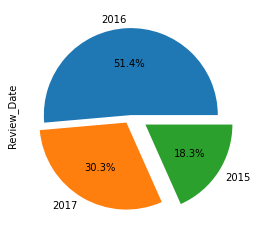

In [ ]:
# more no. of reviews are recorded in the year 2016
df2.Review_Date.str[-4:].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1,0.2])
plt.show()

In [ ]:
#Here Review_Date is a str 
# and extracting the year and month from the date 
# and storing as yyyymm as one column/feature
yr = df2.Review_Date.str[-4:]  
month =df2.Review_Date.str[:2]
month = month.apply(lambda x:x.replace('/',''))
# df2['year_Month'] = ((df2.Review_Date.str[-4:].astype(int)*100)+(df2.Review_Date.str[:2].astype(int))).astype(str)
df2['year_Month'] = ((yr.astype(int)*100)+(month.astype(int))).astype(str)
df2['review_month'] = month
df2['year_Month'].value_counts()

201608    2669
201607    2515
201610    2320
201707    2311
201605    2297
201609    2190
201705    2184
201701    2151
201706    2099
201604    2074
201704    2066
201606    2051
201612    2042
201703    1960
201603    1930
201509    1903
201702    1887
201508    1883
201601    1850
201510    1844
201602    1827
201611    1763
201511    1741
201512    1737
201708     383
Name: year_Month, dtype: int64

In [ ]:
# sns.lineplot(df2['year_Month'],df2.Reviewer_Score)
# plt.xticks(rotation=90)
# plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


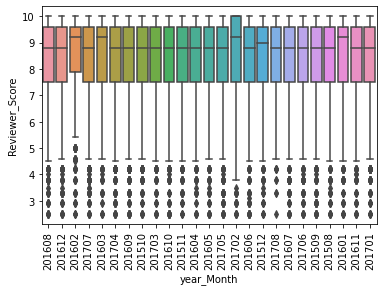

In [ ]:
sns.boxplot(df2['year_Month'],df2.Reviewer_Score)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


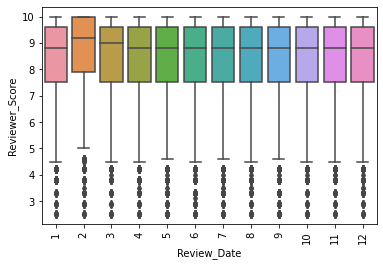

In [ ]:
#month wise 
month.astype(int)
sns.boxplot(month.astype(int),df2.Reviewer_Score)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


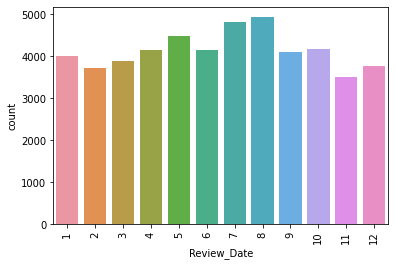

In [ ]:
sns.countplot(month.astype(int))
plt.xticks(rotation=90)
plt.show()

Here in the month of August count of reviews are more in Euprope

In [ ]:
df2.groupby(['Reviewer_Nationality','review_month']).Reviewer_Score.describe()

count       mean  ...     75%   max
Reviewer_Nationality review_month                    ...              
                     1               1.0  10.000000  ...  10.000  10.0
                     10              4.0   8.850000  ...  10.000  10.0
                     11              5.0   9.080000  ...  10.000  10.0
                     12              6.0   7.783333  ...   8.775  10.0
                     2               6.0   8.133333  ...   9.400  10.0
...                                  ...        ...  ...     ...   ...
 Zimbabwe            4               1.0   6.300000  ...   6.300   6.3
                     5               2.0   8.100000  ...   8.200   8.3
                     7               1.0   7.500000  ...   7.500   7.5
                     8               1.0  10.000000  ...  10.000  10.0
                     9               1.0  10.000000  ...  10.000  10.0

[1347 rows x 8 columns]

In [ ]:
# 'Reviewer_Nationality' columns contains spaces .
# treating the spaces as replacing it with 'Others'
df2['Reviewer_Nationality'] = df2['Reviewer_Nationality'].replace(' ','Others')

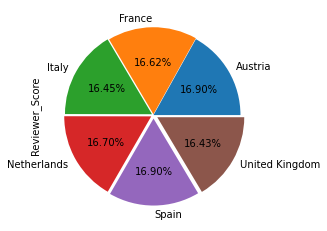

In [ ]:
# df.groupby('Hotel_Country')['Reviewer_Score'].mean()
# country wise average review_score 
df2.groupby('Hotel_Country')['Reviewer_Score'].mean().plot(kind='pie', autopct='%2.2f%%',explode = [0,0.01,0.02,0.03,0.04,0.05])
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
# df_pos_neg = df2['reviews']

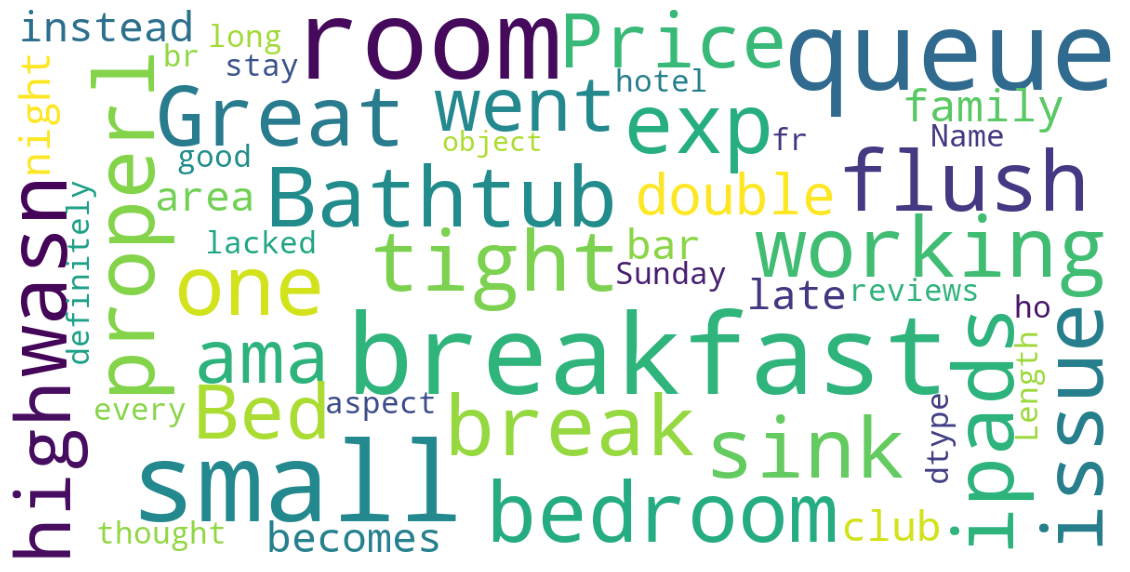

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df_pos_neg, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
#         random_state = 42
    ).generate(str(df_pos_neg))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df2['reviews'])

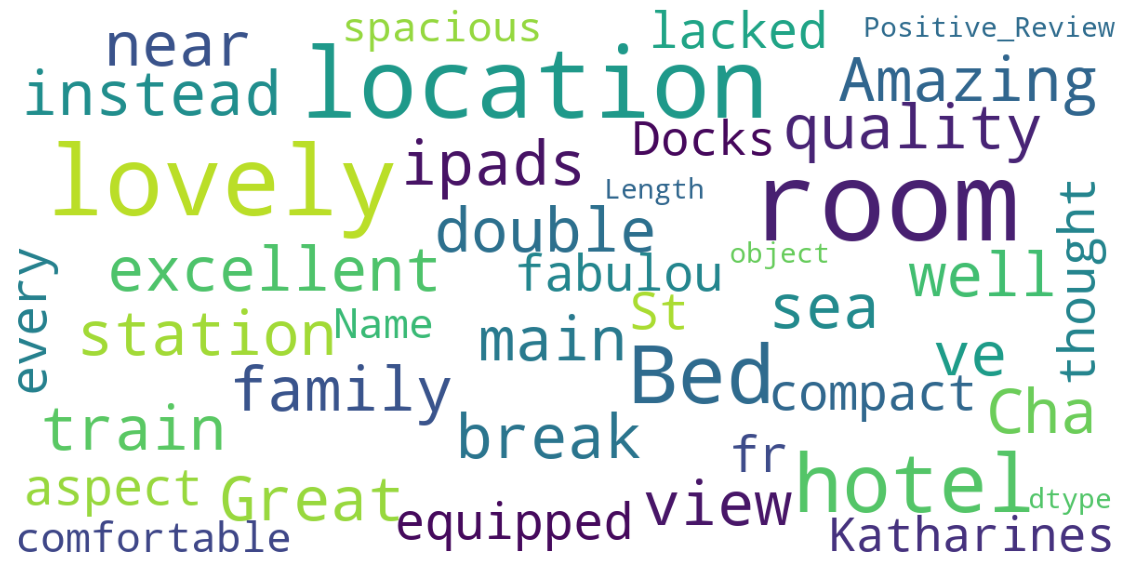

In [ ]:
# cloud count for positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df_pos_neg, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
#         random_state = 42
    ).generate(str(df_pos_neg))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df2['Positive_Review'])

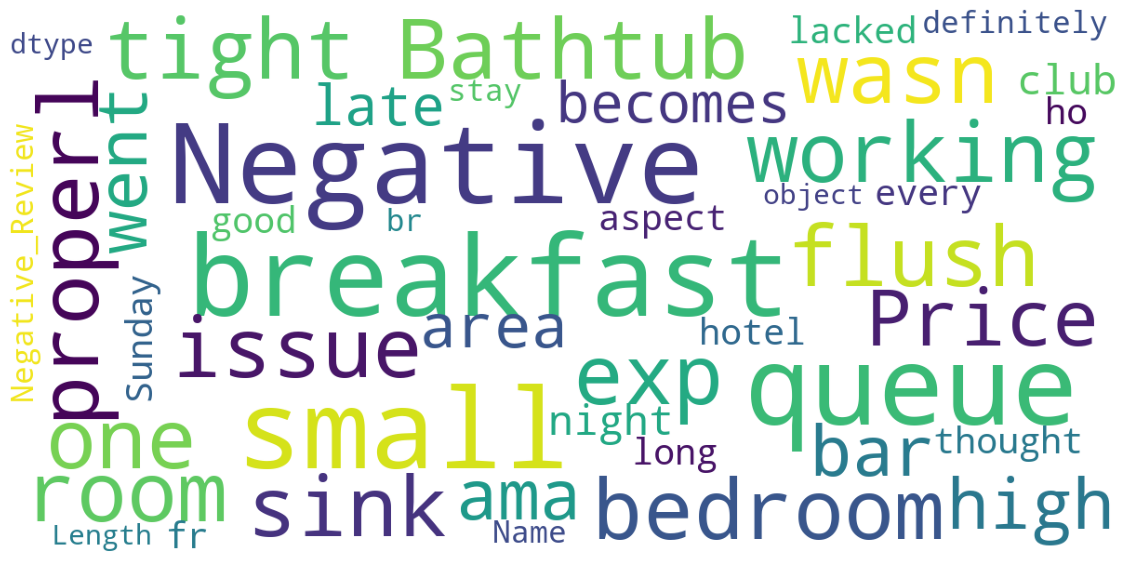

In [ ]:
# cloud count for negative review
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df_pos_neg, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
#         random_state = 42
    ).generate(str(df_pos_neg))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df2['Negative_Review'])

In [ ]:
# df2[['Hotel_Name','Positive_Review','Negative_Review']].head()
#Negative and positive review ratio wrt Hotel name

In [ ]:
!pip install chart-studio

     |████████████████████████████████| 71kB 4.4MB/s 


In [ ]:
#  Using latitude and longitude, you can show the distribution of hotels in Europe using a map.
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [ ]:
#dropping the reset index columns
df2=df2.drop('index',axis=1)
df2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[' Leisure trip ', ' Couple ', ' Superior Doub...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[' Business trip ', ' Group ', ' Premium Doubl...",238 day,52.376418,4.900220,The bedroom was tight and very small They exp...,Netherlands,201612,12
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",534 day,51.514400,-0.156551,Great to have ipads in the room and the break...,United Kingdom,201602,2
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",26 days,48.873278,2.300417,There was only one small issue with the room ...,France,201707,7
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",495 day,51.517167,-0.129053,Price of breakfast was high We went to an ama...,United Kingdom,201603,3


In [ ]:
df2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[' Leisure trip ', ' Couple ', ' Superior Doub...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[' Business trip ', ' Group ', ' Premium Doubl...",238 day,52.376418,4.900220,The bedroom was tight and very small They exp...,Netherlands,201612,12
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",534 day,51.514400,-0.156551,Great to have ipads in the room and the break...,United Kingdom,201602,2
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",26 days,48.873278,2.300417,There was only one small issue with the room ...,France,201707,7
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",495 day,51.517167,-0.129053,Price of breakfast was high We went to an ama...,United Kingdom,201603,3
